In [1]:
from chern_character import Chern_Char, generic_chern_char
import stability
%display latex

## Ideal sheaf $I_L$ of a line in $\mathbb{P}^3$
$v:= \operatorname{ch}(I_L)$

In [2]:
v = Chern_Char(2,0,-1,1)
v

In [3]:
stab = var("alpha beta s", domain='real')

## $\Theta_v$ Curve:

In [4]:
Theta = stability.Lambda(*stab).rank(v) * 2
Theta == 0

-2*alpha^2 + 2*beta^2 - 2 == 0

Rearrange to put in a form suitable for substuting $\alpha^2$ later on.

In [5]:
Theta_curve_substitution = -(Theta == 0) + Theta.subs(alpha == 0)
Theta_curve_substitution = (
    Theta_curve_substitution
    / Theta_curve_substitution.lhs().subs(alpha==1)
)
Theta_curve_substitution

alpha^2 == beta^2 - 1

## $\Gamma_{v,s}$ curve:

In [6]:
Gamma = stability.Lambda(*stab).degree(v)
Gamma

1/3*alpha^2*beta*(6*s + 1) - 1/3*beta^3 + beta + 1

Notice that the $\Gamma_{v,s}$ and $\Theta_v$ curves do not intersect when $s>0$ (have a way of doing this analytically).

In [7]:
def plot_func(s_val = 1/3):

    #Gamma = stability.Lambda(s = s).degree(v)

    return implicit_plot(Theta, (beta, -10,10), (alpha, 0, 10)) \
    + implicit_plot(Gamma.subs(s == s_val), (beta, -10,10), (alpha, 0, 10), rgbcolor="green")

from ipywidgets import interact
interact(plot_func)

interactive(children=(FloatSlider(value=0.3333333333333333, description='s_val', max=1.0, min=-0.3333333333333…

<function plot_func at 0x7f3604b8a830>

## Intersections of the Two Curves

Substituting $\alpha^2 = \cdots$ into the $\Gamma_{v,s}$ curve equation gives a cubic in $\beta$ who's roots correspond to the points of intersection between the two curves (for a fixed $s$).

In [8]:
intersection_eqn = (
  stability.Lambda(*stab).degree(v)
    .subs(Theta_curve_substitution)
)
expand(intersection_eqn)

2*beta^3*s - 2*beta*s + 2/3*beta + 1

Seek the roots of this equation in $\beta$ for $s>0$

In [9]:
def plot_func(s_val = 1/3):
    return plot(intersection_eqn.subs(s == s_val), (beta, -3,3))

interact(plot_func)

interactive(children=(FloatSlider(value=0.3333333333333333, description='s_val', max=1.0, min=-0.3333333333333…

<function plot_func at 0x7f35fe6f6ef0>

Finding the root:

2/3*beta^3 + 1

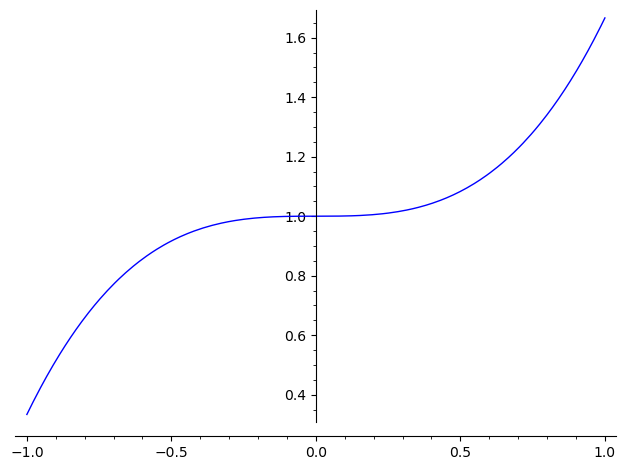

In [10]:
display(expand(intersection_eqn.subs(s==1/3)))
plot(intersection_eqn.subs(s==1/3))

In [11]:
var("x",domain="real")
R_beta = (x^3+3).roots(ring=RealField(300))[0][0]
R_beta = -(3/2)^(1/3)
R_beta

-(3/2)^(1/3)

In [12]:
R_alpha = sqrt(Theta_curve_substitution.rhs().subs(beta == R_beta))
R_alpha

sqrt((3/2)^(2/3) - 1)

In [13]:
beta_max = R_beta + R_alpha
beta_min = R_beta - R_alpha
float(beta_min), float(beta_max)

(-1.7018234752038492, -0.5876050099028146)

## $\nu$ and $\lambda$ walls for $I_L$

Let $A \to I_L$ be a $\nu_{\alpha, \beta}$- stable destabilizing object in $\mathfrak{B}^{\beta}$

In [14]:
var("r c d k")
A = Chern_Char(r, -c, d, k)
A

The conditions that $A$ and $I_L/A$ are in $\mathfrak{B}^{\beta}$ give:

In [15]:
condition1 = stability.Tilt(alpha,beta).rank(A) > 0
condition1

-beta*r - c > 0

In [16]:
condition2 = stability.Tilt(alpha,beta).rank(v - A) >= 0
condition2

beta*(r - 2) + c >= 0

In [17]:
condition1 = condition1 + c
condition1

-beta*r > c

In [18]:
condition2 = condition2 - condition2.lhs().subs(c==0)
condition2

c >= -beta*(r - 2)

These are in particular, satisfied for $\beta=$`beta_min` and `beta_max`

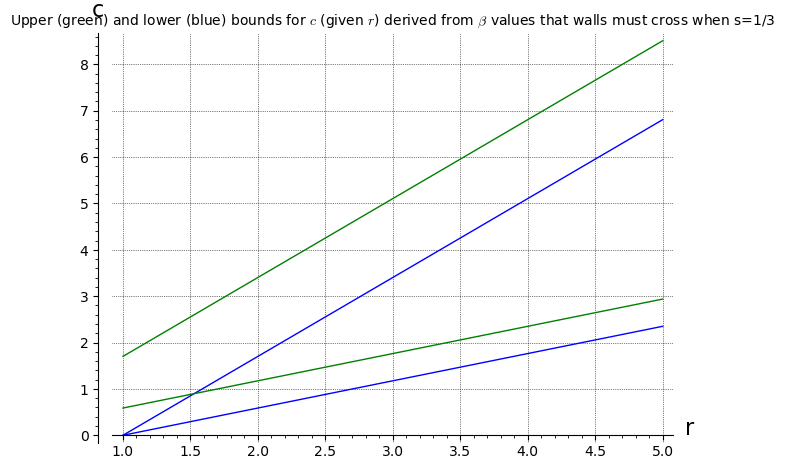

Using the following beta values:
-sqrt((3/2)^(2/3) - 1) - (3/2)^(1/3)
sqrt((3/2)^(2/3) - 1) - (3/2)^(1/3)


In [19]:
p = ( #plot(sqrt(2)*r,(r,1,6), rgbcolor="green", label="a")
#+ plot(sqrt(2)*(r-1),(r,1,5))
plot(-beta_min*(r-1),(r,1,5))
+ plot(-beta_min*(r),(r,1,5), rgbcolor="green")
+ plot(-beta_max*(r-1),(r,1,5))
+ plot(-beta_max*(r),(r,1,5), rgbcolor="green")
)
p.axes_labels(['r', 'c'])
p.show(
    title=r'Upper (green) and lower (blue) bounds for $c$ (given $r$) derived from $\beta$ values that walls must cross when s=1/3',
    gridlines=True,
    legend_loc="lower right"
)
print("Using the following beta values:", beta_min, beta_max, sep="\n")

Bogomolov-Gieseker inequality for $A$ gives a bound on $d$ (for a fixed $r$ and $d$):

In [20]:
Bogomlv_ineq = A.Q_tilt() >= 0
(Bogomlv_ineq / 2 + d*r) / r # Minor rearrangements

1/2*c^2/r >= d

In [21]:
Bogomlv_ineq = (v - A).Q_tilt() >= 0
(Bogomlv_ineq ) # Minor rearrangements

c^2 - 2*(d + 1)*(r - 2) >= 0

Now consider the fact that $A$ destabilizes $I_L$ on the $\Theta_v$ curve:

In [22]:
factor(expand(
    stability.Tilt(alpha,beta).wall_eqn(A, v)
      .subs(Theta_curve_substitution) # consider a stability condition on the Theta curve
      .subs(s == 1/3) # Fix s=1/3
))

-(2*beta*c + 2*d + r)*beta

In [23]:
destab_cond = expand(
    stability.Lambda(*stab).rank(A) # A can only destabilize if it has infinite slope
      .subs(Theta_curve_substitution) # it's still on the Theta curve though
) == 0
destab_cond

beta*c + d + 1/2*r == 0